In [10]:
import torch 
from torch import nn 
from torch.utils.data import DataLoader 
from torchvision import datasets 
from torchvision.transforms import ToTensor 
import numpy as np
import matplotlib.pyplot as plt


In [22]:
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor()
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor()
)

class_names = datasets.FashionMNIST.classes
print(class_names)

['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [7]:
batch_size = 64

train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)



Text(0.5, 1.0, 'Dress')

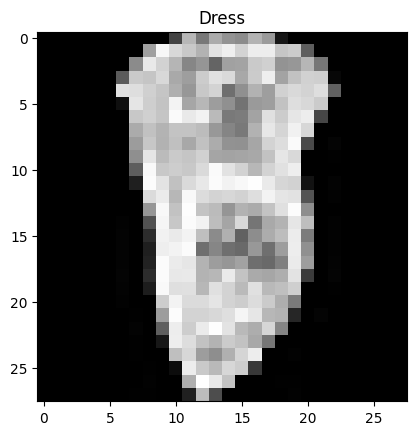

In [28]:
ind = np.random.randint(len(train_dataloader))
plt.imshow(train_dataloader.dataset[ind][0].squeeze(), cmap='gray')
plt.title(class_names[train_dataloader.dataset[ind][1]])

In [60]:
device = ("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using {device} device")

class MyFirstNeuralNetwork(nn.Module): 
    def __init__(self): 
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    
    def forward(self, x): 
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = MyFirstNeuralNetwork().to(device)
print(model)

Using cuda device
MyFirstNeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [37]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

def training_loop(dataloader, model, loss_fn, optimizer): 
    size = len(dataloader.dataset)
    model.train()
    for batch, (X, y) in enumerate(dataloader): 
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        # if batch % 100 == 0: 
        #     loss, current = loss.item(), (batch + 1) * len(X)
        #     print(f"loss: {loss:>7f} [{current:>5d}/{size:>5d}]")

def test(dataloader, model, loss_fn): 
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    model.eval()
    test_loss, correct = 0, 0 
    with torch.no_grad(): 
        for X, y in dataloader:
            X, y = X.to(device), y.to(device)
            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()
    
    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f}\n")

In [38]:
epochs = 50
for i in range(epochs): 
    print(f"Epoch {i+1}\n-------------------------------")
    training_loop(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)

Epoch 1
-------------------------------
Test Error: 
 Accuracy: 76.7%, Avg loss: 0.659850

Epoch 2
-------------------------------
Test Error: 
 Accuracy: 77.1%, Avg loss: 0.646694

Epoch 3
-------------------------------
Test Error: 
 Accuracy: 77.7%, Avg loss: 0.634616

Epoch 4
-------------------------------
Test Error: 
 Accuracy: 78.1%, Avg loss: 0.623513

Epoch 5
-------------------------------
Test Error: 
 Accuracy: 78.5%, Avg loss: 0.613298

Epoch 6
-------------------------------
Test Error: 
 Accuracy: 78.8%, Avg loss: 0.603888

Epoch 7
-------------------------------
Test Error: 
 Accuracy: 79.1%, Avg loss: 0.595201

Epoch 8
-------------------------------
Test Error: 
 Accuracy: 79.5%, Avg loss: 0.587176

Epoch 9
-------------------------------
Test Error: 
 Accuracy: 79.7%, Avg loss: 0.579747

Epoch 10
-------------------------------
Test Error: 
 Accuracy: 79.9%, Avg loss: 0.572859

Epoch 11
-------------------------------
Test Error: 
 Accuracy: 80.1%, Avg loss: 0.56646

Text(0.5, 1.0, 'True: Sandal, Predicted: Sandal')

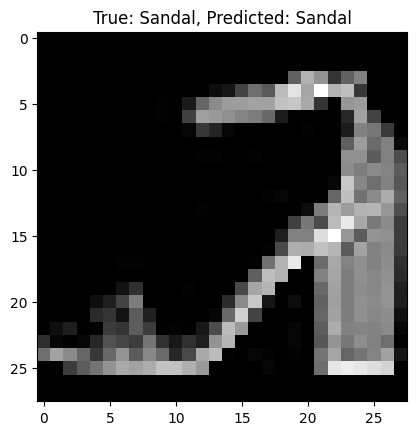

In [58]:
ind_img = np.random.randint(len(test_dataloader.dataset))
img, label = test_dataloader.dataset[ind_img]
pred = model(img.unsqueeze(0).to(device))
predicted_label = class_names[pred.argmax().to("cpu").item()]
plt.imshow(img.squeeze(), cmap='gray')
plt.title(f"True: {class_names[label]}, Predicted: {predicted_label}")


['root',
 'transform',
 'target_transform',
 'transforms',
 'train',
 'data',
 'targets',
 '__module__',
 '__doc__',
 'mirrors',
 'resources',
 'classes',
 '__parameters__',
 'training_file',
 'test_file',
 'train_labels',
 'test_labels',
 'train_data',
 'test_data',
 '__init__',
 '_check_legacy_exist',
 '_load_legacy_data',
 '_load_data',
 '__getitem__',
 '__len__',
 'raw_folder',
 'processed_folder',
 'class_to_idx',
 '_check_exists',
 'download',
 'extra_repr',
 '_repr_indent',
 '__repr__',
 '_format_transform_repr',
 '__add__',
 '__orig_bases__',
 '__dict__',
 '__weakref__',
 '__slots__',
 '_is_protocol',
 '__class_getitem__',
 '__init_subclass__',
 '__annotations__',
 '__new__',
 '__hash__',
 '__str__',
 '__getattribute__',
 '__setattr__',
 '__delattr__',
 '__lt__',
 '__le__',
 '__eq__',
 '__ne__',
 '__gt__',
 '__ge__',
 '__reduce_ex__',
 '__reduce__',
 '__getstate__',
 '__subclasshook__',
 '__format__',
 '__sizeof__',
 '__dir__',
 '__class__']